##**THEORY QUESTIONS**

### **Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer**:

The main idea behind ensemble techniques is that combining multiple models usually gives better results than relying on just one. Instead of trusting a single model’s prediction, ensemble methods merge the outputs of several models to reduce errors and improve accuracy.

**Bagging** (Bootstrap Aggregating) builds several independent models using different random samples of the training data. Each model votes or averages its result, which reduces variance and prevents overfitting.

**Boosting**, on the other hand, builds models sequentially — each new model focuses more on the mistakes made by the previous ones. Its goal is to reduce bias by gradually improving weak learners.

In short:

* **Bagging** = parallel, reduces variance.

* **Boosting** = sequential, reduces bias.

### **Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Answer**:

A single decision tree can easily overfit because it tries to perfectly fit the training data. Random Forest combats this by creating many trees on different random subsets of data and features, then averaging their predictions. This randomness ensures that no single tree dominates the model and reduces overfitting.

Two important hyperparameters are:

**1. n_estimators** – the number of trees. More trees usually mean better generalization but also higher computation time.

**2. max_features** – the number of features considered for each split. Limiting this introduces randomness, which helps make trees less correlated and improves generalization.

### **Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer**:

**Stacking** (or stacked generalization) is an ensemble method that combines predictions from multiple different models using a “meta-model.” The base models first make predictions, and then the meta-model learns how to best combine those predictions.

Unlike bagging or boosting — which combine models of the same type — stacking often blends different models (like decision trees, logistic regression, and SVM) to capture diverse patterns.

**Example**: A Kaggle competition model might use a Random Forest, XGBoost, and Neural Network as base learners, and then use a Logistic Regression as the meta-model to combine their outputs.

### **Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer**:

OOB (Out-of-Bag) Score is an internal validation method used in Random Forests. Since each tree is trained on a bootstrap sample (a random subset of the data), about one-third of the samples are left out. These “out-of-bag” samples are then used to test that tree’s performance.

By averaging these OOB predictions, we get an unbiased estimate of the model’s accuracy — similar to having a separate validation set, but without needing to split the data again. It saves time and data while still providing a reliable evaluation metric.

### **Question 5: Compare AdaBoost and Gradient Boosting in terms of**:
● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

**Answer**:

**AdaBoost** and **Gradient Boosting** are both boosting algorithms that improve weak learners step by step, but they differ in how they correct previous mistakes and how they adjust model weights.

**1. Handling Errors from Weak Learners**:

* **AdaBoost** focuses directly on the **data points** that were misclassified by previous learners. It increases the weights of those hard-to-predict samples so the next learner pays more attention to them.

* **Gradient Boosting** focuses on the **residual errors** (the difference between the true and predicted values). Each new model is trained to predict these residuals, effectively performing gradient descent on a loss function.

**2. eight Adjustment Mechanism**:

* **AdaBoost** updates the weights of individual samples after each round. Misclassified samples get higher weights, and correctly classified ones get lower weights.

* **Gradient Boosting** does not adjust sample weights explicitly. Instead, it updates the predictions by fitting each new learner to the gradient (error) of the loss function, which indirectly adjusts the model’s focus.

**3. Typical Use Cases**:

* **AdaBoost** works well when you have clean, simple datasets and prefer fast results — often paired with decision stumps (one-level trees).

* **Gradient Boosting** is more flexible and powerful, used for complex problems such as structured/tabular data in finance, healthcare, and competitions. It forms the foundation of advanced variants like XGBoost, LightGBM, and CatBoost.


### **Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer**:

CatBoost (short for “Categorical Boosting”) is designed to handle categorical data natively. Instead of manually encoding categories (like one-hot or label encoding), CatBoost uses a smart technique called target-based encoding with random permutations.

It replaces each category with statistics (like the mean target value) computed in a way that avoids data leakage. This allows CatBoost to handle categorical features efficiently and accurately, even with high-cardinality features, saving preprocessing effort and improving model performance.

## **PRACTICAL QUESTIONS**

### **Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task**:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:

      a. Accuracy

      b. Precision, Recall, F1-Score (print classification report)

4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

**Answer**:


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("=== Unscaled KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== Scaled KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

summary = pd.DataFrame({
    "Model": ["Unscaled KNN", "Scaled KNN", "Optimized KNN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_unscaled),
        accuracy_score(y_test, y_pred_scaled),
        accuracy_score(y_test, y_pred_best)
    ]
})

print("\n=== Model Comparison Summary ===")
print(summary)

=== Unscaled KNN Results ===
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== Scaled KNN Results ===
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.

### **Question 8 : PCA + KNN with Variance Analysis and Visualization**
**Task**:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

**Answer**:

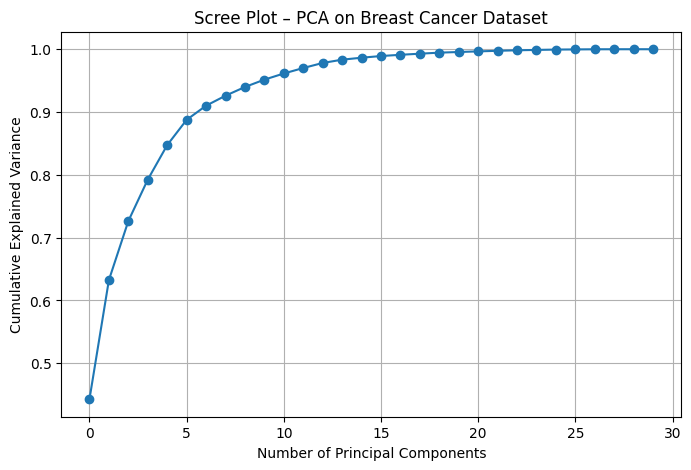

Number of components retained for 95% variance: 10

=== KNN Performance Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Accuracy: 0.9474


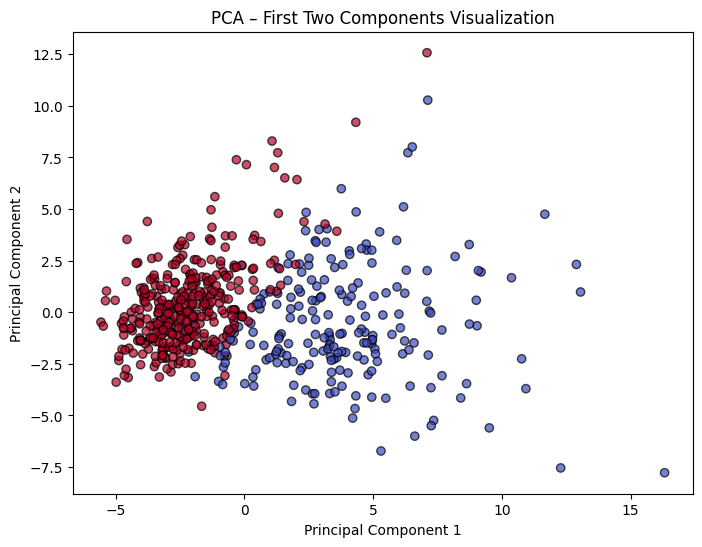

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot – PCA on Breast Cancer Dataset")
plt.grid(True)
plt.show()

pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Number of components retained for 95% variance: {pca_95.n_components_}")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

acc_original = accuracy_score(y_test, y_pred_original)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== KNN Performance Comparison ===")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA (95% variance) Accuracy: {acc_pca:.4f}")

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA – First Two Components Visualization")
plt.show()

### **Question 9:KNN Regressor with Distance Metrics and K-Value Analysis**
**Task**:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

**Answer**:

=== KNN Regressor Comparison (K=5) ===
Euclidean Distance MSE: 4803.9056
Manhattan Distance MSE: 5210.2258


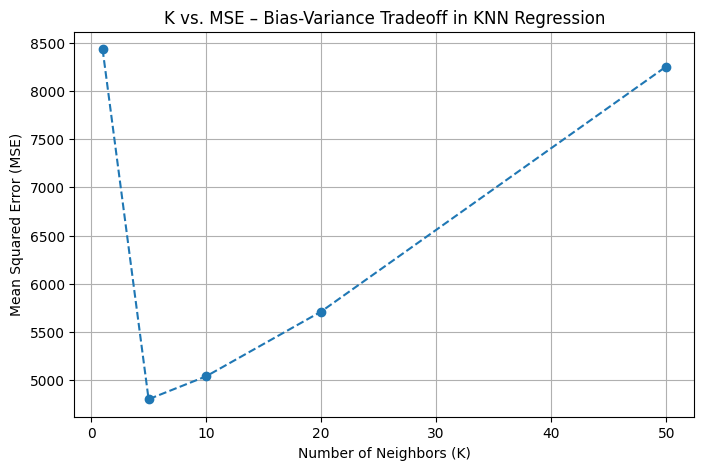

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== KNN Regressor Comparison (K=5) ===")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("K vs. MSE – Bias-Variance Tradeoff in KNN Regression")
plt.grid(True)
plt.show()

### **Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data**
**Task**:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:

   a. Brute-force method

   b. KD-Tree

   c. Ball Tree

4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes

**Answer**:

Dataset shape: (768, 9)
Missing values (zeros):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

=== Algorithm Comparison ===
   Algorithm  Accuracy  Training Time (s)
0      brute  0.735931           0.004177
1    kd_tree  0.735931           0.008250
2  ball_tree  0.735931           0.007814

Best Performing Algorithm: brute
Top 2 features used for visualization: ['Glucose', 'Insulin']


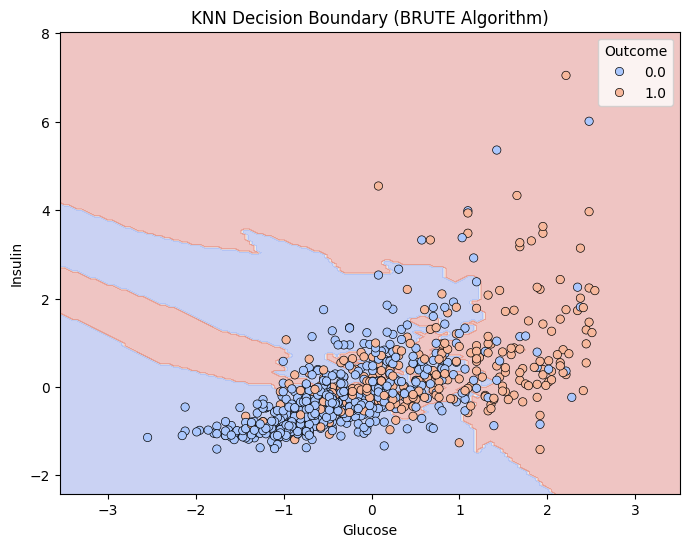

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

print("Dataset shape:", data.shape)
print("Missing values (zeros):")
print((data == 0).sum())

cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    results.append({'Algorithm': algo, 'Accuracy': acc, 'Training Time (s)': end - start})

results_df = pd.DataFrame(results)
print("\n=== Algorithm Comparison ===")
print(results_df)

best_algo = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Algorithm']
print(f"\nBest Performing Algorithm: {best_algo}")

corr = data_imputed.corr()['Outcome'].drop('Outcome').abs().sort_values(ascending=False)
top_features = corr.index[:2].tolist()

print(f"Top 2 features used for visualization: {top_features}")

X_vis = data_imputed[top_features]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis_scaled, y, test_size=0.3, random_state=42, stratify=y
)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_v, y_train_v)

x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(
    x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1],
    hue=y, palette='coolwarm', edgecolor='k'
)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f"KNN Decision Boundary ({best_algo.upper()} Algorithm)")
plt.show()
